@Author:Girish<br>
@Date: 09-10-2024<br>
@Last modified by: Girish<br>
@Last modified Date:09-10-2024 <br>
@Title: Based on bank customer data, predicted whether cutomer will subscribe to
term deposit or not using single and Multi layrer neural network<br>


        Importing Necessary Libraries and Loading the data

In [33]:
# Step 1: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report

# Load the dataset from the provided URL
url = 'https://drive.google.com/uc?id=1E0EURgsF3L9Bt5hnOalE0d4Tw9mIOgTn'
data = pd.read_csv(url, sep=';')
data



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


        Handling outliers

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

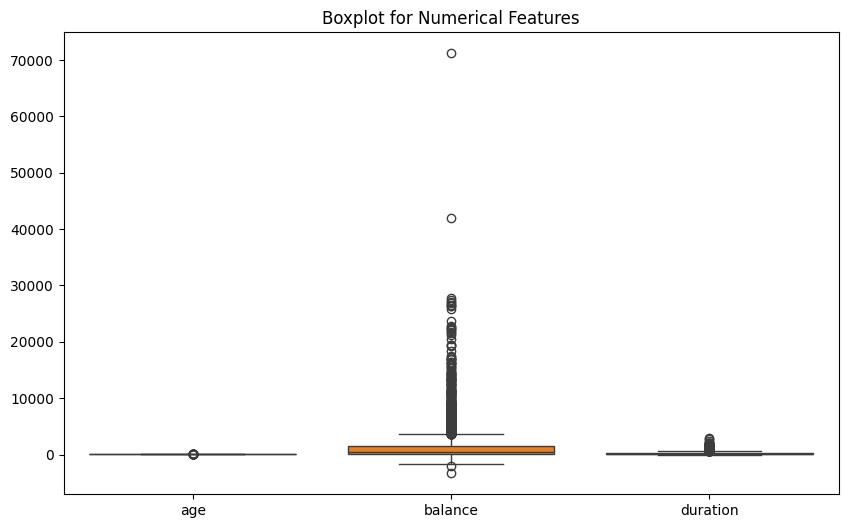

In [22]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['age', 'balance', 'duration']])
plt.title('Boxplot for Numerical Features')
plt.show()



In [23]:
# Step 3: Handle outliers
# Removing outliers using the IQR method
Q1 = data[['age', 'balance', 'duration']].quantile(0.25)
Q3 = data[['age', 'balance', 'duration']].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
data = data[~((data[['age', 'balance', 'duration']] < (Q1 - 1.5 * IQR)) | (data[['age', 'balance', 'duration']] > (Q3 + 1.5 * IQR))).any(axis=1)]



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

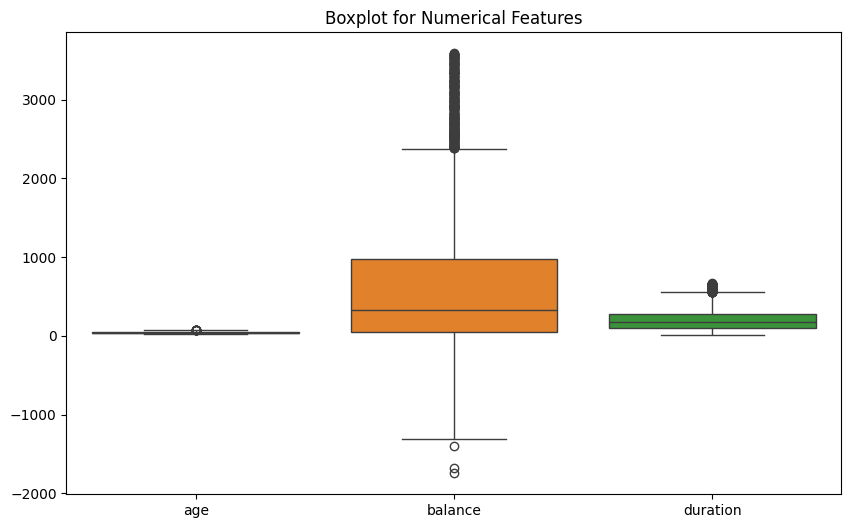

In [25]:
#  Visualizing after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['age', 'balance', 'duration']])
plt.title('Boxplot for Numerical Features')
plt.show()

        Splitting the Data

In [26]:
# Step 4: Split the data
X = data.drop('y', axis=1)
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])



In [27]:
# Apply preprocessing to training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Step 6: Build the Neural Network Model
model = Sequential()
model.add(Dense(1, input_dim=X_train_processed.shape[1], activation='sigmoid'))  # Single layer neural network


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


        Training the Model

In [28]:

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 7: Train the Model
model.fit(X_train_processed, y_train, epochs=50, batch_size=10, verbose=1)



Epoch 1/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8832 - loss: 0.4172
Epoch 2/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9212 - loss: 0.2689
Epoch 3/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9249 - loss: 0.2314
Epoch 4/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9229 - loss: 0.2197
Epoch 5/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9169 - loss: 0.2230
Epoch 6/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9208 - loss: 0.2086
Epoch 7/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9241 - loss: 0.2047
Epoch 8/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9205 - loss: 0.2007
Epoch 9/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9295 - loss: 0.1855
Epoch 10/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9229 - loss: 0.1979
Epoch 11/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9265 - loss: 0.1979
Epoch 12/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [29]:
# Step 8: Evaluate the Model
y_pred = (model.predict(X_test_processed) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       677
           1       0.56      0.22      0.32        63

    accuracy                           0.92       740
   macro avg       0.75      0.60      0.64       740
weighted avg       0.90      0.92      0.90       740



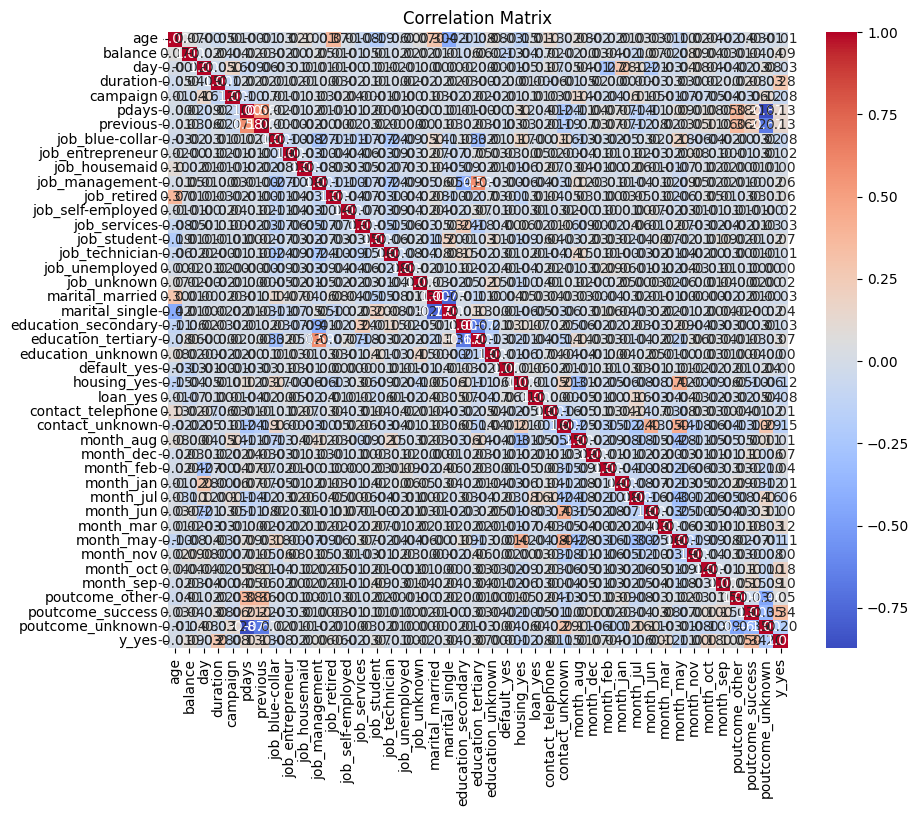

In [31]:
encoded_data = pd.get_dummies(data, drop_first=True)
plt.figure(figsize=(10, 8))
correlation_matrix = encoded_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

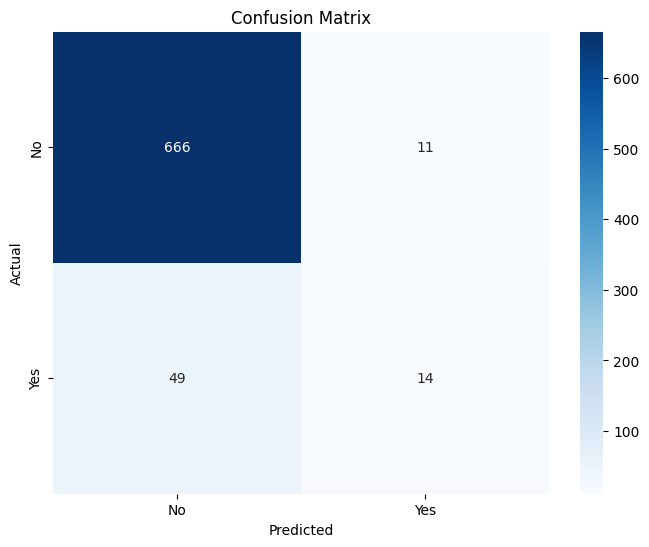

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 10: Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

1. Based on bank customer data, predicted whether cutomer will subscribe to
term deposit or not using Multilayer network

        Loading Dataset

In [9]:
# Load the dataset from the provided URL
url = 'https://drive.google.com/uc?id=1E0EURgsF3L9Bt5hnOalE0d4Tw9mIOgTn'
data = pd.read_csv(url, sep=';')




        Handling Outliers

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

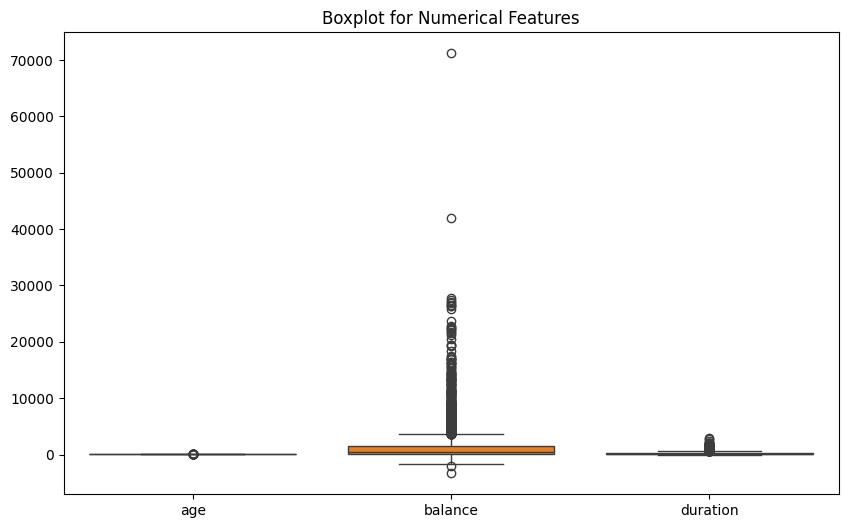

In [10]:
# Step 2: Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['age', 'balance', 'duration']])
plt.title('Boxplot for Numerical Features')
plt.show()



In [11]:
# Step 3: Handle outliers
# Removing outliers using the IQR method
Q1 = data[['age', 'balance', 'duration']].quantile(0.25)
Q3 = data[['age', 'balance', 'duration']].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
encoded_data = pd.get_dummies(data, drop_first=True)

# Calculate and plot the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = encoded_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Filter out the outliers
data = data[~((data[['age', 'balance', 'duration']] < (Q1 - 1.5 * IQR)) | (data[['age', 'balance', 'duration']] > (Q3 + 1.5 * IQR))).any(axis=1)]


        Splitting the Data , Encoding and Featire Scaling

In [13]:
# Step 4: Split the data
X = data.drop('y', axis=1)
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert target variable to binary


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Preprocess the data
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [15]:


# Identify : Preprocess the datacategorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [16]:
# Apply preprocessing to training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Step 6: Build the Multilayer Neural Network Model
model = Sequential()
# Adding input layer and first hidden layer
model.add(Dense(32, input_dim=X_train_processed.shape[1], activation='relu'))  # First hidden layer
# Adding second hidden layer
model.add(Dense(16, activation='relu'))  # Second hidden layer
# Adding output layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


        Training the Model

In [17]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 7: Train the Model
model.fit(X_train_processed, y_train, epochs=50, batch_size=10, verbose=1)


Epoch 1/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8563 - loss: 0.3690
Epoch 2/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9154 - loss: 0.2179
Epoch 3/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9293 - loss: 0.1876
Epoch 4/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9381 - loss: 0.1633
Epoch 5/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9334 - loss: 0.1599
Epoch 6/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9381 - loss: 0.1588
Epoch 7/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9376 - loss: 0.1569
Epoch 8/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9393 - loss: 0.1573
Epoch 9/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9411 - loss: 0.1538
Epoch 10/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9438 - loss: 0.1416
Epoch 11/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9375 - loss: 0.1514
Epoch 12/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [18]:

# Step 8: Evaluate the Model
y_pred = (model.predict(X_test_processed) > 0.5).astype("int32")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


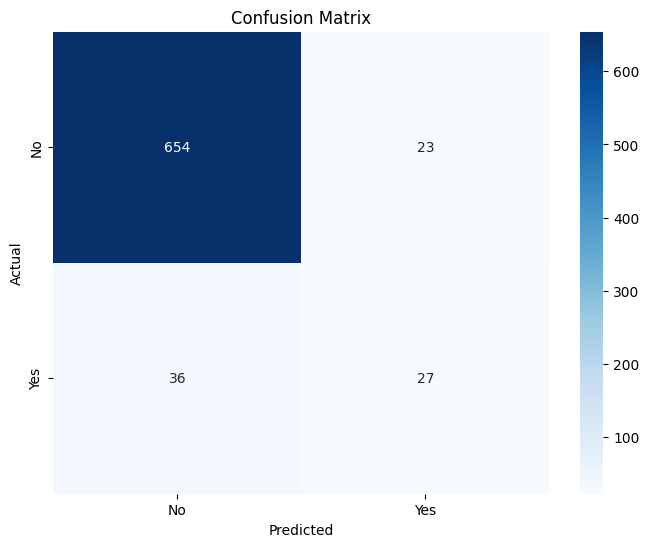

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 10: Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
